#Prova de Conceito para Conclusão da Pós-Graduação em Business Inteligence Master na PUC-Rio

##Importação das Bibliotecas

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [31]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Abertura do Arquivo

In [32]:
dataset_all = pd.read_csv('Bloco-DadosPOCv2.csv', encoding = 'utf-8')

In [33]:
dataset_all.head()

,Ano,Mês,Dias do mês,Demanda máxima (kW),Demanda Contratada (kW),Consumo Ponta (kWh),Consumo Fora de Ponta (kWh),Tarifa de Energia Ponta (R$/MWh),Tarifa de Energia Fora de Ponta (R$/MWh),Tarifa de Demanda Ponta e Fora de Ponta (R$/kW),...,Preço Contratado no ACL (R$/MWh),PLDmed,Perdas na Rede Básica (%),Mwmed,Mwmed Contratado,PIS (%),COFINS (%),ICMS(%),Flexibilidade do Contrato Inferior,Flexibilidade do Contrato Superior
0,2010,Janeiro,31,3087.4,3800.0,61433.300,874408.300,1079.78,369.86,12.35,...,202.41,12.91,3,1.257852,1.6,1.65,7.6,29.0,0.6,1.3
1,2010,Fevereiro,28,3191.0,3800.0,63043.200,832833.025,1079.78,369.86,12.35,...,202.41,13.82,3,1.333149,1.6,1.65,7.6,29.0,0.6,1.3
2,2010,Março,31,3916.8,3800.0,97689.650,1145070.825,1079.78,369.86,12.35,...,202.41,27.24,3,1.670377,1.6,1.65,7.6,29.0,0.6,1.3
3,2010,Abril,30,3732.5,3800.0,84809.875,784432.125,1079.78,369.86,12.35,...,202.41,21.47,3,1.207281,1.6,1.65,7.6,29.0,0.6,1.3
4,2010,Maio,31,3237.1,3800.0,74067.725,908939.525,1079.78,369.86,12.35,...,202.41,32.34,3,1.321246,1.6,1.65,7.6,29.0,0.6,1.3


#Processamento de Dados para a Previsão da Demanda Máxima

##Dados de Consumo e Demanda a Serem Utilizados

In [34]:
dataset_consume_demand = dataset_all.iloc[:,3:7]

In [35]:
dataset_consume_demand.head()

,Demanda máxima (kW),Demanda Contratada (kW),Consumo Ponta (kWh),Consumo Fora de Ponta (kWh)
0,3087.4,3800.0,61433.300,874408.300
1,3191.0,3800.0,63043.200,832833.025
2,3916.8,3800.0,97689.650,1145070.825
3,3732.5,3800.0,84809.875,784432.125
4,3237.1,3800.0,74067.725,908939.525


In [36]:
len(dataset_consume_demand)

48

##Dados de Treinamento - Demanda Máxima

In [37]:
max_demand_training_set = dataset_consume_demand.iloc[:42,:1].values

In [38]:
max_demand_training_set

array([[3087.4],
       [3191. ],
       [3916.8],
       [3732.5],
       [3237.1],
       [2603.5],
       [2499.8],
       [3156.5],
       [3098.9],
       [3018.2],
       [2764.8],
       [3467.5],
       [2741.8],
       [3582.7],
       [3559.7],
       [3721. ],
       [3075.8],
       [2603.5],
       [2188.8],
       [3363.8],
       [2672.6],
       [3363.8],
       [3617.3],
       [3225.6],
       [2753.3],
       [3145. ],
       [3997.4],
       [3409.9],
       [3317.8],
       [2903. ],
       [2281. ],
       [3317.8],
       [3421.4],
       [3525.1],
       [3944.6],
       [3696. ],
       [3393. ],
       [3024. ],
       [3581.8],
       [4247. ],
       [3924.5],
       [3521.3]])

##Gráfico da Série Temporal - Demanda Máxima

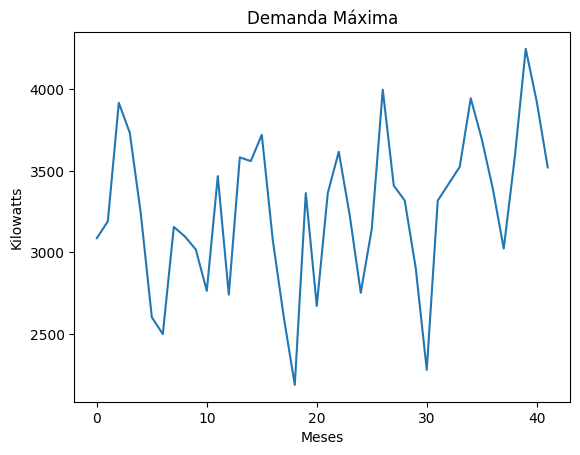

In [39]:
plt.plot(max_demand_training_set)
plt.xlabel("Meses")
plt.ylabel("Kilowatts")
plt.title("Demanda Máxima")
plt.show()

##Normalização - Demanda Máxima

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
max_demand_training_set_scaled = sc.fit_transform(max_demand_training_set)

##Criação da Estrutura de Dados - Demanda Máxima

In [41]:
window = 10
trainSize = len(max_demand_training_set_scaled)
horizon = 10
max_demand_X_train = []
max_demand_y_train = []
for i in range(window, trainSize-horizon):
    max_demand_X_train.append(max_demand_training_set_scaled[i-window:i, 0])
    max_demand_y_train.append(max_demand_training_set_scaled[i:i+window, 0])
max_demand_X_train, max_demand_y_train = np.array(max_demand_X_train), np.array(max_demand_y_train)

##Reshaping - Demanda Máxima

In [42]:
max_demand_X_train.shape

(22, 10)

In [43]:
max_demand_y_train.shape

(22, 10)

In [44]:
max_demand_X_train = np.reshape(max_demand_X_train, (max_demand_X_train.shape[0], max_demand_X_train.shape[1], 1))

In [45]:
max_demand_X_train.shape

(22, 10, 1)

In [46]:
max_demand_y_train = np.reshape(max_demand_y_train, (max_demand_y_train.shape[0], max_demand_y_train.shape[1], 1))

In [47]:
max_demand_y_train.shape

(22, 10, 1)

#Construção da RNN - Demanda Máxima

##Importação das Bibliotecas

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Construção da Rede Completa

In [60]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (max_demand_X_train.shape[1], 1)))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.3))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 20)                9680      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


##Treinamento

In [61]:
regressor.fit(max_demand_X_train, max_demand_y_train, epochs = 200, batch_size = 7)

Epoch 1/200
4/4 [==============================] - 3s 10ms/step - loss: 0.2867
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1705
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0780
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0658
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0719
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0619
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0603
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0675
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0633
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0613
Epoch 11/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0632
Epoch 12/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0618
Epoch 13/200
4/4 [==============================] -

#Previsão e Análise dos Resultados - Demanda Máxima

##Dados de Teste

In [62]:
max_demand_test_set = dataset_all.iloc[42:,:1].values

##Construção da Estrutura para Teste

In [63]:
max_demand_total = pd.concat((dataset_consume_demand.iloc[:42,:1], dataset_consume_demand.iloc[42:,:1]), axis = 0)
dcd_testLength = len(dataset_consume_demand.iloc[42:,:])
inputs = max_demand_total[len(max_demand_total) - dcd_testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
max_demand_X_test = []
for i in range(window, dcd_testLength + window): 
    max_demand_X_test.append(inputs[i-window:i, 0])
max_demand_X_test = np.array(max_demand_X_test)
max_demand_X_test = np.reshape(max_demand_X_test, (max_demand_X_test.shape[0], max_demand_X_test.shape[1], 1))

##Realização das previsões

In [64]:
predicted_max_demand = regressor.predict(max_demand_X_test)
predicted_max_demand = sc.inverse_transform(predicted_max_demand)

1/1 [==============================] - 1s 550ms/step


In [65]:
df_max_demand_training_set = pd.DataFrame(max_demand_training_set)

##Visualização dos Resultados de Treino e Teste

1/1 [==============================] - 0s 22ms/step


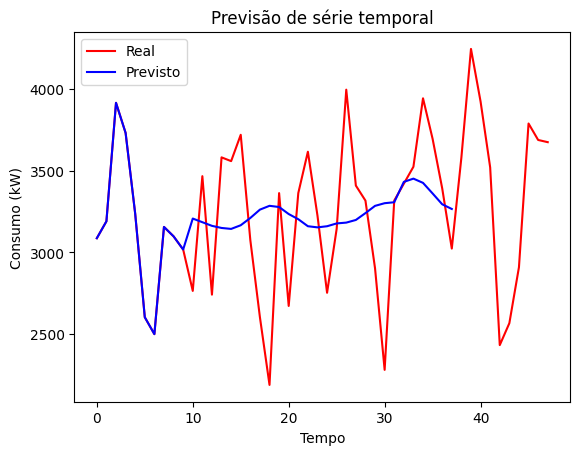

In [66]:
allTarget_max_demand = np.vstack((dataset_consume_demand.iloc[:42,:1], dataset_consume_demand.iloc[42:,:1]))
training_predicted_max_demand = regressor.predict(max_demand_X_train)
training_predicted_max_demand = sc.inverse_transform(training_predicted_max_demand)
allForecasted_max_demand = np.vstack((df_max_demand_training_set[0:window], training_predicted_max_demand, predicted_max_demand))
plt.plot(allTarget_max_demand, color = 'red', label = 'Real')
plt.plot(allForecasted_max_demand, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Consumo (kW)')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

#Métricas de Avaliação - Demanda Máxima

In [67]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(max_demand_test_set, predicted_max_demand))
print('RMSE: ', rmse)

RMSE:  1358.3282277638368


In [68]:
mse = mean_squared_error(max_demand_test_set, predicted_max_demand)
print('MSE: ',mse)

MSE:  1845055.5743400455


In [69]:
mape = np.mean(np.abs((max_demand_test_set - predicted_max_demand) / max_demand_test_set)) * 100
print('MAPE: ',mape)

MAPE:  67.28541459986774


#Processamento de Dados para a Previsão da Demanda Contratada

##Dados de Treinamento - Demanda Contratada

In [71]:
hired_demand_training_set = dataset_consume_demand.iloc[:42,1:2].values

In [72]:
hired_demand_training_set

array([[3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.],
       [3800.]])

##Gráfico da Série Temporal - Demanda Contratada

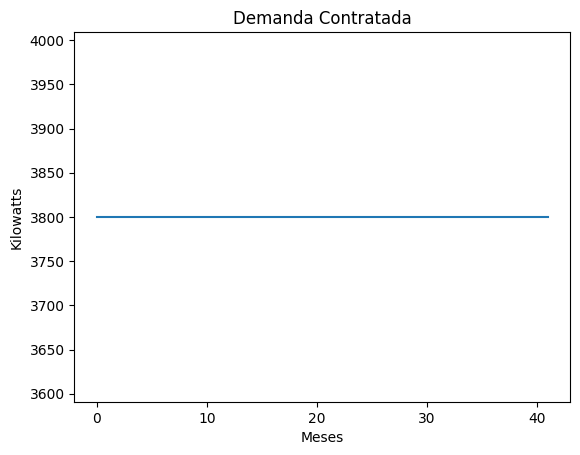

In [73]:
plt.plot(hired_demand_training_set)
plt.xlabel("Meses")
plt.ylabel("Kilowatts")
plt.title("Demanda Contratada")
plt.show()

##Normalização - Demanda Contratada

In [74]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
hired_demand_training_set_scaled = sc.fit_transform(hired_demand_training_set)

##Criação da Estrutura de Dados - Demanda Contratada

In [75]:
window = 10
trainSize = len(hired_demand_training_set_scaled)
horizon = 10
hired_demand_X_train = []
hired_demand_y_train = []
for i in range(window, trainSize-horizon):
    hired_demand_X_train.append(hired_demand_training_set_scaled[i-window:i, 0])
    hired_demand_y_train.append(hired_demand_training_set_scaled[i:i+window, 0])
hired_demand_X_train, hired_demand_y_train = np.array(hired_demand_X_train), np.array(hired_demand_y_train)

##Reshaping - Demanda Contratada

In [76]:
hired_demand_X_train.shape

(22, 10)

In [77]:
hired_demand_y_train.shape

(22, 10)

In [78]:
hired_demand_X_train = np.reshape(hired_demand_X_train, (hired_demand_X_train.shape[0], hired_demand_X_train.shape[1], 1))

In [79]:
hired_demand_X_train.shape

(22, 10, 1)

In [80]:
hired_demand_y_train = np.reshape(hired_demand_y_train, (hired_demand_y_train.shape[0], hired_demand_y_train.shape[1], 1))

In [81]:
hired_demand_y_train.shape

(22, 10, 1)

#Construção da RNN - Demanda Contratada

##Importação das Bibliotecas

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Construção da Rede Completa

In [94]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (hired_demand_X_train.shape[1], 1)))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.3))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 20)                9680      
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


##Treinamento

In [95]:
regressor.fit(hired_demand_X_train, hired_demand_y_train, epochs = 200, batch_size = 7)

Epoch 1/200
4/4 [==============================] - 3s 8ms/step - loss: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 12/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0000e+00
Epoch 13/20

#Previsão e Análise dos Resultados - Demanda Contratada

##Dados de Teste

In [96]:
hired_demand_test_set = dataset_all.iloc[42:,4:5].values

##Construção da Estrutura para Teste

In [97]:
hired_demand_total = pd.concat((dataset_consume_demand.iloc[:42,1:2], dataset_consume_demand.iloc[42:,1:2]), axis = 0)
dcd_testLength = len(dataset_consume_demand.iloc[42:,:])
inputs = hired_demand_total[len(hired_demand_total) - dcd_testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
hired_demand_X_test = []
for i in range(window, dcd_testLength + window): 
    hired_demand_X_test.append(inputs[i-window:i, 0])
hired_demand_X_test = np.array(hired_demand_X_test)
hired_demand_X_test = np.reshape(hired_demand_X_test, (hired_demand_X_test.shape[0], hired_demand_X_test.shape[1], 1))

##Realização das previsões

In [98]:
predicted_hired_demand = regressor.predict(hired_demand_X_test)
predicted_hired_demand = sc.inverse_transform(predicted_hired_demand)

1/1 [==============================] - 1s 543ms/step


In [99]:
df_hired_demand_training_set = pd.DataFrame(hired_demand_training_set)

##Visualização dos Resultados de Treino e Teste

1/1 [==============================] - 0s 18ms/step


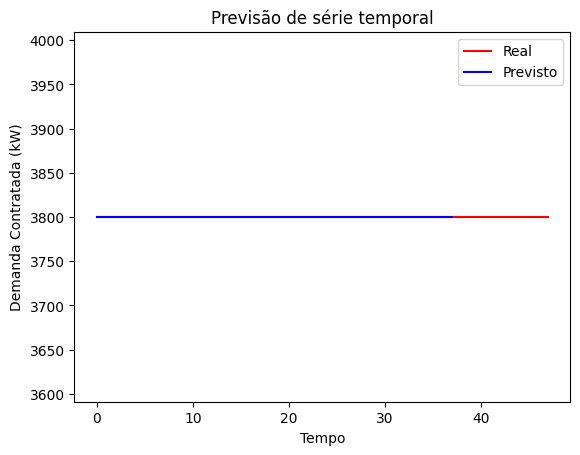

In [100]:
allTarget_hired_demand = np.vstack((dataset_consume_demand.iloc[:42,1:2], dataset_consume_demand.iloc[42:,1:2]))
training_predicted_hired_demand = regressor.predict(hired_demand_X_train)
training_predicted_hired_demand = sc.inverse_transform(training_predicted_hired_demand)
allForecasted_hired_demand = np.vstack((df_hired_demand_training_set[0:window], training_predicted_hired_demand, predicted_hired_demand))
plt.plot(allTarget_hired_demand, color = 'red', label = 'Real')
plt.plot(allForecasted_hired_demand, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Demanda Contratada (kW)')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

#Métricas de Avaliação - Demanda Contratada

In [101]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(hired_demand_test_set, predicted_hired_demand))
print('RMSE: ', rmse)

RMSE:  0.0


In [102]:
mse = mean_squared_error(hired_demand_test_set, predicted_hired_demand)
print('MSE: ',mse)

MSE:  0.0


In [103]:
mape = np.mean(np.abs((hired_demand_test_set - predicted_hired_demand) / hired_demand_test_set)) * 100
print('MAPE: ',mape)

MAPE:  0.0


#Processamento de Dados para a Previsão do Consumo de Ponta

##Dados de Treinamento - Consumo Ponta

In [105]:
highprice_consume_training_set = dataset_consume_demand.iloc[:42,2:3].values

In [106]:
highprice_consume_training_set

array([[ 61433.3  ],
       [ 63043.2  ],
       [ 97689.65 ],
       [ 84809.875],
       [ 74067.725],
       [ 41276.05 ],
       [ 29482.575],
       [ 47900.075],
       [ 62565.25 ],
       [ 61263.375],
       [  8593.85 ],
       [101203.05 ],
       [ 94446.6  ],
       [101139.625],
       [131702.325],
       [131368.275],
       [110574.525],
       [102553.8  ],
       [ 86218.6  ],
       [116285.65 ],
       [114013.725],
       [117193.   ],
       [116550.75 ],
       [ 91621.175],
       [ 49078.1  ],
       [ 62600.   ],
       [ 95227.25 ],
       [ 78413.65 ],
       [ 75548.075],
       [ 44936.875],
       [ 14394.05 ],
       [ 63129.65 ],
       [ 78664.325],
       [ 71539.4  ],
       [ 58680.475],
       [ 65410.725],
       [ 82898.   ],
       [ 82095.   ],
       [105844.   ],
       [157722.   ],
       [131371.   ],
       [121908.   ]])

##Gráfico da Série Temporal - Consumo Ponta

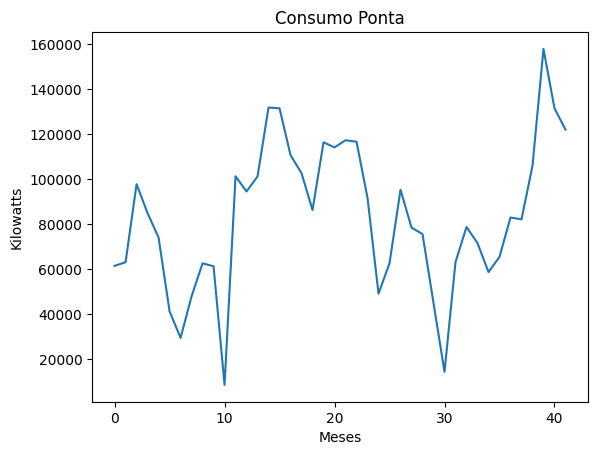

In [107]:
plt.plot(highprice_consume_training_set)
plt.xlabel("Meses")
plt.ylabel("Kilowatts")
plt.title("Consumo Ponta")
plt.show()

##Normalização - Consumo Ponta

In [108]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
highprice_consume_training_set_scaled = sc.fit_transform(highprice_consume_training_set)

##Criação da Estrutura de Dados - Consumo Ponta

In [109]:
window = 10
trainSize = len(highprice_consume_training_set_scaled)
horizon = 10
highprice_consume_X_train = []
highprice_consume_y_train = []
for i in range(window, trainSize-horizon):
    highprice_consume_X_train.append(highprice_consume_training_set_scaled[i-window:i, 0])
    highprice_consume_y_train.append(highprice_consume_training_set_scaled[i:i+window, 0])
highprice_consume_X_train, highprice_consume_y_train = np.array(highprice_consume_X_train), np.array(highprice_consume_y_train)

##Reshaping - Consumo Ponta

In [110]:
highprice_consume_X_train.shape

(22, 10)

In [111]:
highprice_consume_y_train.shape

(22, 10)

In [112]:
highprice_consume_X_train = np.reshape(highprice_consume_X_train, (highprice_consume_X_train.shape[0], highprice_consume_X_train.shape[1], 1))

In [113]:
highprice_consume_X_train.shape

(22, 10, 1)

In [114]:
highprice_consume_y_train = np.reshape(highprice_consume_y_train, (highprice_consume_y_train.shape[0], highprice_consume_y_train.shape[1], 1))

In [115]:
highprice_consume_y_train.shape

(22, 10, 1)

#Construção da RNN - Consumo Ponta

##Importação das Bibliotecas

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Construção da Rede Completa

In [128]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (highprice_consume_X_train.shape[1], 1)))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.3))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_19 (LSTM)              (None, 20)                9680      
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


##Treinamento

In [129]:
regressor.fit(highprice_consume_X_train, highprice_consume_y_train, epochs = 200, batch_size = 7)

Epoch 1/200
4/4 [==============================] - 3s 8ms/step - loss: 0.2771
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1450
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0824
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0950
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0804
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0743
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0709
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0673
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0652
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0681
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0683
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 13/200
4/4 [==============================] - 0s 7ms/

#Previsão e Análise dos Resultados - Consumo Ponta

##Dados de Teste

In [130]:
highprice_consume_test_set = dataset_all.iloc[42:,2:3].values

##Construção da Estrutura para Teste

In [131]:
highprice_consume_total = pd.concat((dataset_consume_demand.iloc[:42,2:3], dataset_consume_demand.iloc[42:,2:3]), axis = 0)
dcd_testLength = len(dataset_consume_demand.iloc[42:,:])
inputs = highprice_consume_total[len(highprice_consume_total) - dcd_testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
highprice_consume_X_test = []
for i in range(window, dcd_testLength + window): 
    highprice_consume_X_test.append(inputs[i-window:i, 0])
highprice_consume_X_test = np.array(highprice_consume_X_test)
highprice_consume_X_test = np.reshape(highprice_consume_X_test, (highprice_consume_X_test.shape[0], highprice_consume_X_test.shape[1], 1))

##Realização das previsões

In [132]:
predicted_highprice_consume = regressor.predict(highprice_consume_X_test)
predicted_highprice_consume = sc.inverse_transform(predicted_highprice_consume)

1/1 [==============================] - 1s 687ms/step


In [133]:
df_highprice_consume_training_set = pd.DataFrame(highprice_consume_training_set)

##Visualização dos Resultados de Treino e Teste

1/1 [==============================] - 0s 21ms/step


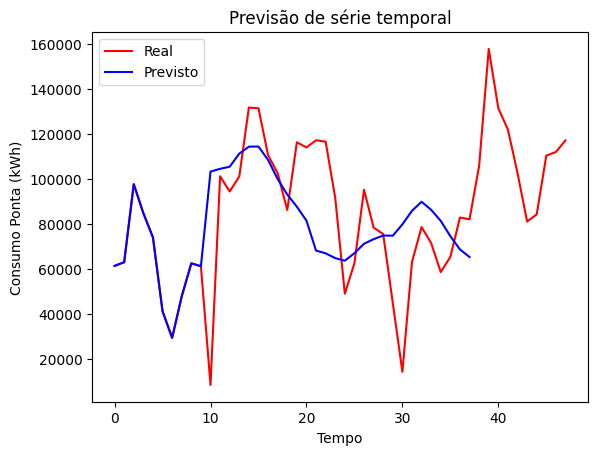

In [134]:
allTarget_highprice_consume = np.vstack((dataset_consume_demand.iloc[:42,2:3], dataset_consume_demand.iloc[42:,2:3]))
training_predicted_highprice_consume = regressor.predict(highprice_consume_X_train)
training_predicted_highprice_consume = sc.inverse_transform(training_predicted_highprice_consume)
allForecasted_highprice_consume = np.vstack((df_highprice_consume_training_set[0:window], training_predicted_highprice_consume, predicted_highprice_consume))
plt.plot(allTarget_highprice_consume, color = 'red', label = 'Real')
plt.plot(allForecasted_highprice_consume, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Consumo Ponta (kWh)')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

#Métricas de Avaliação - Consumo Ponta

In [135]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(highprice_consume_test_set, predicted_highprice_consume))
print('RMSE: ', rmse)

RMSE:  78190.39084525342


In [136]:
mse = mean_squared_error(highprice_consume_test_set, predicted_highprice_consume)
print('MSE: ',mse)

MSE:  6113737220.53349


In [137]:
mape = np.mean(np.abs((highprice_consume_test_set - predicted_highprice_consume) / highprice_consume_test_set)) * 100
print('MAPE: ',mape)

MAPE:  253264.63247647852


#Processamento de Dados para a Previsão do Consumo Fora de Ponta

##Dados de Treinamento - Consumo Fora de Ponta

In [139]:
lowprice_consume_training_set = dataset_consume_demand.iloc[:42,3:].values

In [140]:
lowprice_consume_training_set

array([[ 874408.3  ],
       [ 832833.025],
       [1145070.825],
       [ 784432.125],
       [ 908939.525],
       [ 720235.675],
       [ 725713.5  ],
       [ 819731.8  ],
       [ 835885.4  ],
       [ 830062.025],
       [  57412.9  ],
       [ 872838.625],
       [ 816289.875],
       [ 942560.275],
       [ 980245.1  ],
       [ 989672.   ],
       [ 901454.5  ],
       [ 765679.85 ],
       [ 673743.725],
       [ 861699.   ],
       [ 800527.4  ],
       [ 902710.575],
       [ 844562.775],
       [ 787717.525],
       [ 871894.525],
       [ 827345.975],
       [1104860.625],
       [1011231.675],
       [ 934715.925],
       [ 596641.15 ],
       [ 201275.2  ],
       [ 851892.175],
       [ 933425.25 ],
       [1012204.55 ],
       [ 853562.175],
       [ 824799.25 ],
       [ 888552.   ],
       [ 845544.   ],
       [1003296.   ],
       [1269408.   ],
       [1069320.   ],
       [ 947520.   ]])

##Gráfico da Série Temporal - Consumo Fora de Ponta

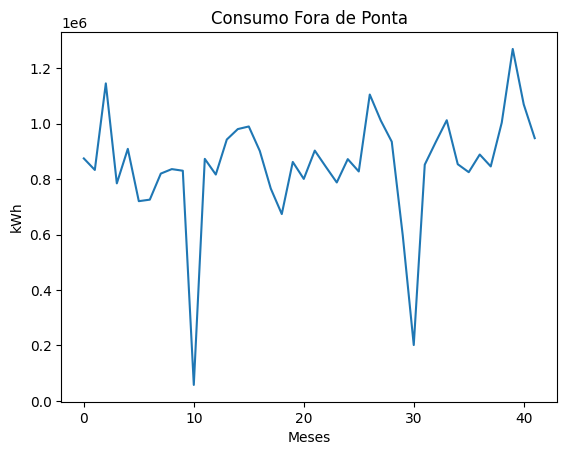

In [141]:
plt.plot(lowprice_consume_training_set)
plt.xlabel("Meses")
plt.ylabel("kWh")
plt.title("Consumo Fora de Ponta")
plt.show()

##Normalização - Consumo Fora de Ponta

In [142]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
lowprice_consume_training_set_scaled = sc.fit_transform(lowprice_consume_training_set)

##Criação da Estrutura de Dados - Consumo Fora de Ponta

In [143]:
window = 10
trainSize = len(lowprice_consume_training_set_scaled)
horizon = 10
lowprice_consume_X_train = []
lowprice_consume_y_train = []
for i in range(window, trainSize-horizon):
    lowprice_consume_X_train.append(lowprice_consume_training_set_scaled[i-window:i, 0])
    lowprice_consume_y_train.append(lowprice_consume_training_set_scaled[i:i+window, 0])
lowprice_consume_X_train, lowprice_consume_y_train = np.array(lowprice_consume_X_train), np.array(lowprice_consume_y_train)

##Reshaping - Consumo Fora de Ponta

In [144]:
lowprice_consume_X_train.shape

(22, 10)

In [145]:
lowprice_consume_y_train.shape

(22, 10)

In [146]:
lowprice_consume_X_train = np.reshape(lowprice_consume_X_train, (lowprice_consume_X_train.shape[0], lowprice_consume_X_train.shape[1], 1))

In [147]:
lowprice_consume_X_train.shape

(22, 10, 1)

In [148]:
lowprice_consume_y_train = np.reshape(lowprice_consume_y_train, (lowprice_consume_y_train.shape[0], lowprice_consume_y_train.shape[1], 1))

In [149]:
lowprice_consume_y_train.shape

(22, 10, 1)

#Construção da RNN - Consumo Fora de Ponta

##Importação das Bibliotecas

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Construção da Rede Completa

In [151]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (lowprice_consume_X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
#regressor.add(LSTM(units = 80, return_sequences = True))
#regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.3))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_21 (LSTM)              (None, 20)                9680      
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


##Treinamento

In [152]:
regressor.fit(lowprice_consume_X_train, lowprice_consume_y_train, epochs = 200, batch_size = 7)

Epoch 1/200
4/4 [==============================] - 3s 8ms/step - loss: 0.4357
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1337
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0490
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0563
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0508
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0467
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0446
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0476
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0341
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0351
Epoch 12/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0381
Epoch 13/200
4/4 [==============================] - 0s 8ms/

#Previsão e Análise dos Resultados - Consumo Fora de Ponta

##Dados de Teste

In [153]:
dataset_all.head()

,Ano,Mês,Dias do mês,Demanda máxima (kW),Demanda Contratada (kW),Consumo Ponta (kWh),Consumo Fora de Ponta (kWh),Tarifa de Energia Ponta (R$/MWh),Tarifa de Energia Fora de Ponta (R$/MWh),Tarifa de Demanda Ponta e Fora de Ponta (R$/kW),...,Preço Contratado no ACL (R$/MWh),PLDmed,Perdas na Rede Básica (%),Mwmed,Mwmed Contratado,PIS (%),COFINS (%),ICMS(%),Flexibilidade do Contrato Inferior,Flexibilidade do Contrato Superior
0,2010,Janeiro,31,3087.4,3800.0,61433.300,874408.300,1079.78,369.86,12.35,...,202.41,12.91,3,1.257852,1.6,1.65,7.6,29.0,0.6,1.3
1,2010,Fevereiro,28,3191.0,3800.0,63043.200,832833.025,1079.78,369.86,12.35,...,202.41,13.82,3,1.333149,1.6,1.65,7.6,29.0,0.6,1.3
2,2010,Março,31,3916.8,3800.0,97689.650,1145070.825,1079.78,369.86,12.35,...,202.41,27.24,3,1.670377,1.6,1.65,7.6,29.0,0.6,1.3
3,2010,Abril,30,3732.5,3800.0,84809.875,784432.125,1079.78,369.86,12.35,...,202.41,21.47,3,1.207281,1.6,1.65,7.6,29.0,0.6,1.3
4,2010,Maio,31,3237.1,3800.0,74067.725,908939.525,1079.78,369.86,12.35,...,202.41,32.34,3,1.321246,1.6,1.65,7.6,29.0,0.6,1.3


In [154]:
lowprice_consume_test_set = dataset_all.iloc[42:,6:7].values

##Construção da Estrutura para Teste

In [155]:
lowprice_consume_total = pd.concat((dataset_consume_demand.iloc[:42,3:], dataset_consume_demand.iloc[42:,3:]), axis = 0)
dcd_testLength = len(dataset_consume_demand.iloc[42:,:])
inputs = lowprice_consume_total[len(lowprice_consume_total) - dcd_testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
lowprice_consume_X_test = []
for i in range(window, dcd_testLength + window): 
    lowprice_consume_X_test.append(inputs[i-window:i, 0])
lowprice_consume_X_test = np.array(lowprice_consume_X_test)
lowprice_consume_X_test = np.reshape(lowprice_consume_X_test, (lowprice_consume_X_test.shape[0], lowprice_consume_X_test.shape[1], 1))

##Realização das previsões

In [156]:
predicted_lowprice_consume = regressor.predict(lowprice_consume_X_test)
predicted_lowprice_consume = sc.inverse_transform(predicted_lowprice_consume)

1/1 [==============================] - 1s 554ms/step


In [157]:
df_lowprice_consume_training_set = pd.DataFrame(lowprice_consume_training_set)

##Visualização dos Resultados de Treino e Teste

1/1 [==============================] - 0s 18ms/step


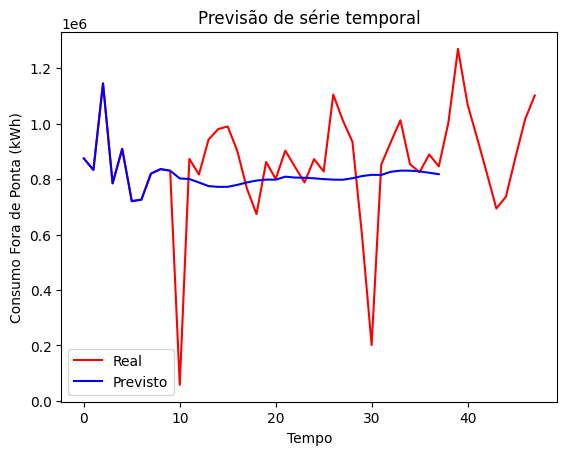

In [158]:
allTarget_lowprice_consume = np.vstack((dataset_consume_demand.iloc[:42,3:], dataset_consume_demand.iloc[42:,3:]))
training_predicted_lowprice_consume = regressor.predict(lowprice_consume_X_train)
training_predicted_lowprice_consume = sc.inverse_transform(training_predicted_lowprice_consume)
allForecasted_lowprice_consume = np.vstack((df_lowprice_consume_training_set[0:window], training_predicted_lowprice_consume, predicted_lowprice_consume))
plt.plot(allTarget_lowprice_consume, color = 'red', label = 'Real')
plt.plot(allForecasted_lowprice_consume, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Consumo Fora de Ponta (kWh)')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

#Métricas de Avaliação - Consumo Fora de Ponta

In [159]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(lowprice_consume_test_set, predicted_lowprice_consume))
print('RMSE: ', rmse)

RMSE:  157025.16656591927


In [160]:
mse = mean_squared_error(lowprice_consume_test_set, predicted_lowprice_consume)
print('MSE: ',mse)

MSE:  24656902935.054688


In [161]:
mape = np.mean(np.abs((lowprice_consume_test_set - predicted_lowprice_consume) / lowprice_consume_test_set)) * 100
print('MAPE: ',mape)

MAPE:  13.924348820510815
